In [ ]:
# Importing Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from google.colab import drive
import warnings
warnings.filterwarnings('ignore')

In [ ]:
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/Mall_Customers.csv'

df = pd.read_csv(file_path)
df.head()

Mounted at /content/drive


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Univariate Analysis

In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


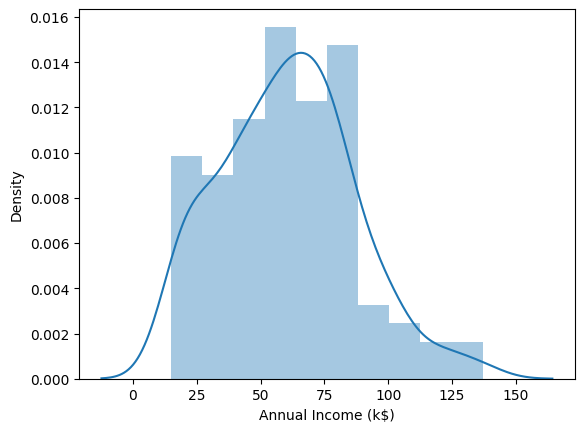

In [ ]:
sns.distplot(df['Annual Income (k$)']);

In [ ]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']

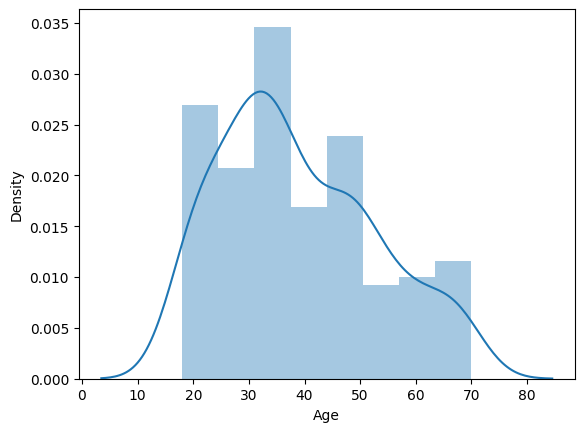

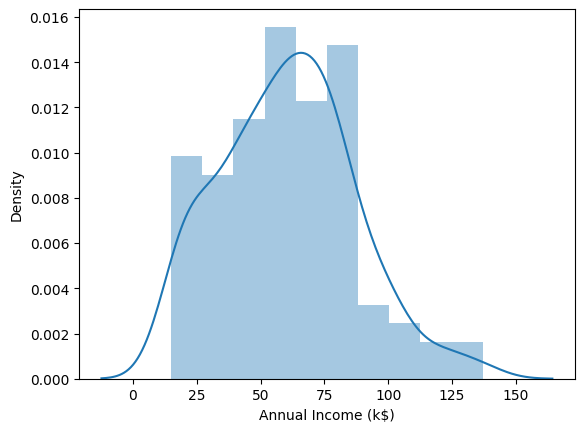

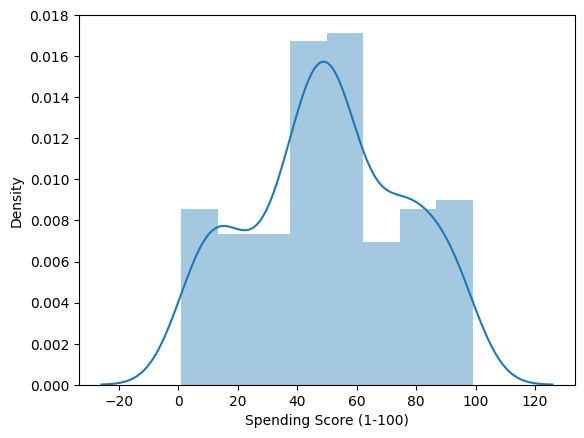

In [ ]:
for i in columns:
  plt.figure()
  sns.distplot(df[i]);


<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

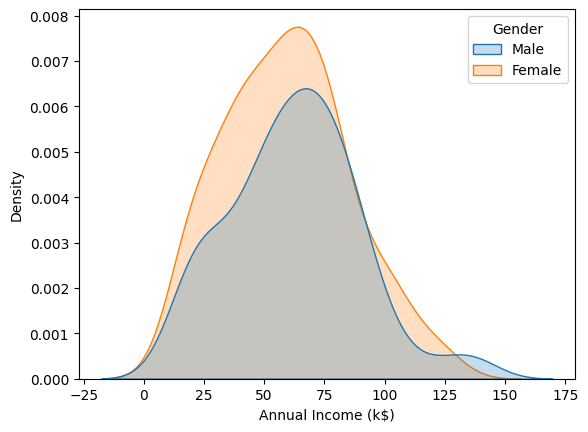

In [ ]:
sns.kdeplot(data=df, x='Annual Income (k$)', hue='Gender', fill=True)

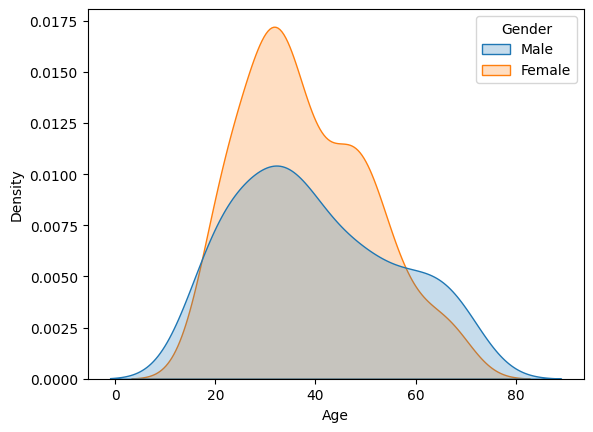

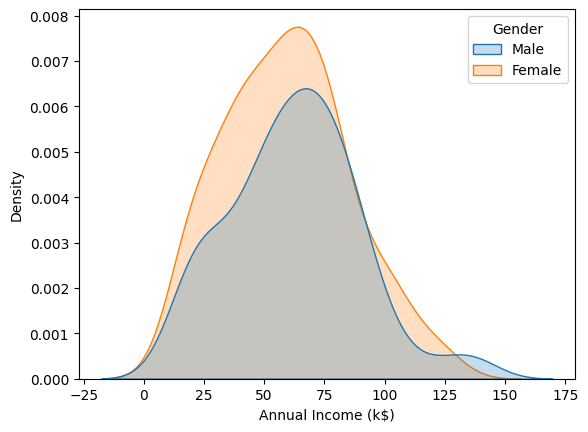

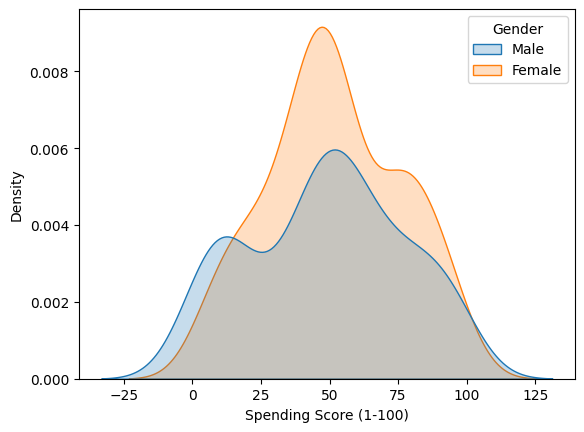

In [ ]:
for i in columns:
  plt.figure()
  sns.kdeplot(data = df, x = i, hue = 'Gender', fill = True);

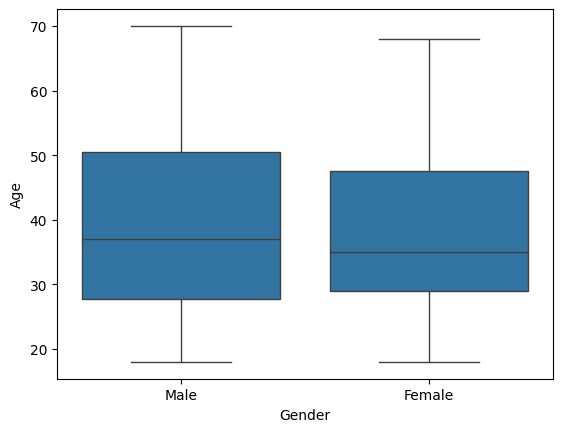

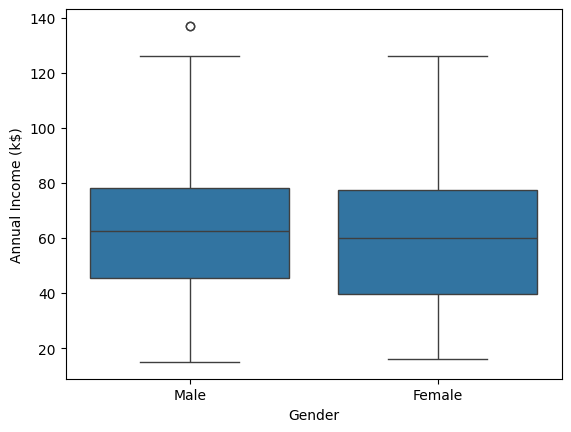

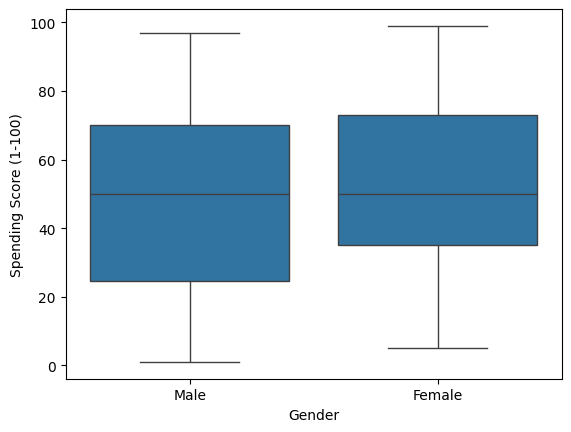

In [ ]:
for i in columns:
  plt.figure()
  sns.boxplot(data = df, y = i, x = 'Gender');

In [ ]:
df['Gender'].value_counts(normalize=True)

,proportion
Gender,
Female,0.56
Male,0.44


## **Bivariate Analysis**

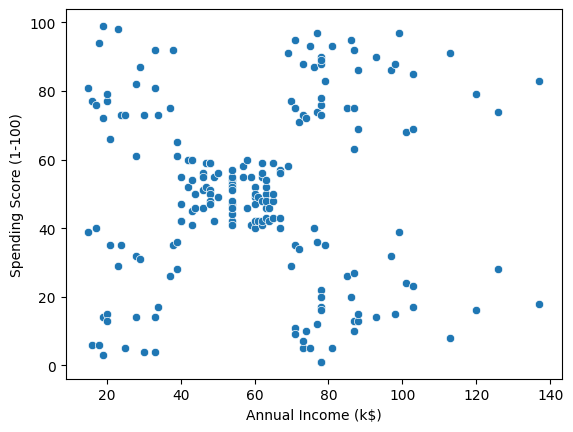

In [ ]:
sns.scatterplot(data = df, x = 'Annual Income (k$)', y = 'Spending Score (1-100)');

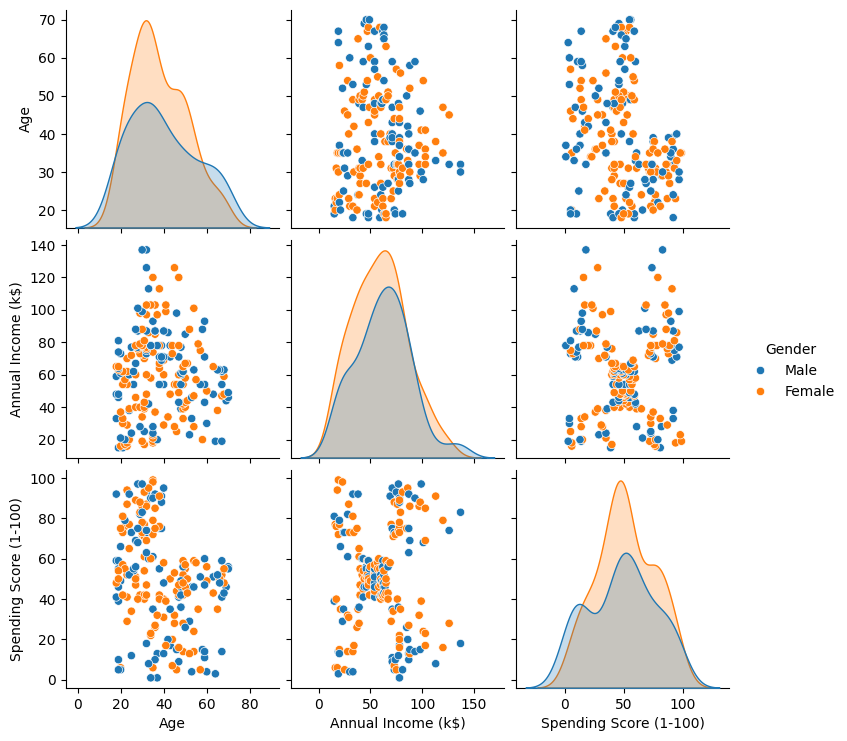

In [ ]:
sns.pairplot(df, hue = 'Gender');

In [ ]:
df.groupby('Gender').mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [ ]:
corr = df.select_dtypes(include = ['number']).corr()

<Axes: >

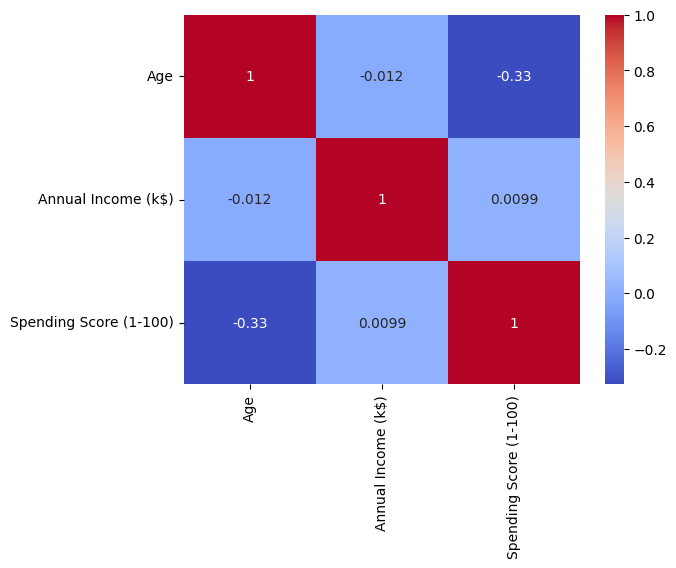

In [ ]:
sns.heatmap(corr, annot = True, cmap = 'coolwarm')

### Clustering - Univariate, Bivariate, Multivariate

In [ ]:
clustering1 = KMeans(n_clusters=3)

In [ ]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [ ]:
clustering1.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [ ]:
df['Income Cluster'] = clustering1.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,Male,19,15,39,2
1,Male,21,15,81,2
2,Female,20,16,6,2
3,Female,23,16,77,2
4,Female,31,17,40,2


In [ ]:
df['Income Cluster'].value_counts()

,count
Income Cluster,
0,86
2,58
1,56


In [ ]:
clustering1.inertia_

3726.186904761905

In [ ]:
inertia_scores = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(df[['Annual Income (k$)']])
  inertia_scores.append(kmeans.inertia_)

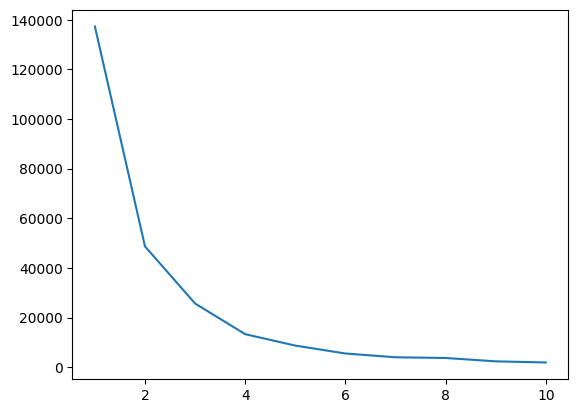

In [ ]:
plt.plot(range(1,11), inertia_scores);

In [ ]:
df.groupby('Income Cluster')[columns].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,41.279070,60.906977,50.337209
1,36.910714,92.142857,50.517857
2,37.120690,29.551724,49.689655


### Bivariate Clustering


In [ ]:
clustering2 = KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
clustering2.labels_

array([1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 0,
       1, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 3, 0, 3, 2, 3, 2, 3,
       0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3], dtype=int32)

In [ ]:
df['Spending and Income Cluster'] = clustering2.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,2,1
1,Male,21,15,81,2,4
2,Female,20,16,6,2,1
3,Female,23,16,77,2,4
4,Female,31,17,40,2,1


In [ ]:
inertia_scores = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
  inertia_scores.append(kmeans.inertia_)

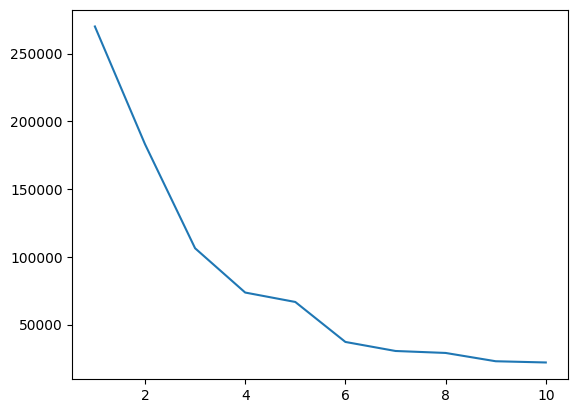

In [ ]:
plt.plot(range(1,11), inertia_scores);

In [ ]:
centers = pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x', 'y']

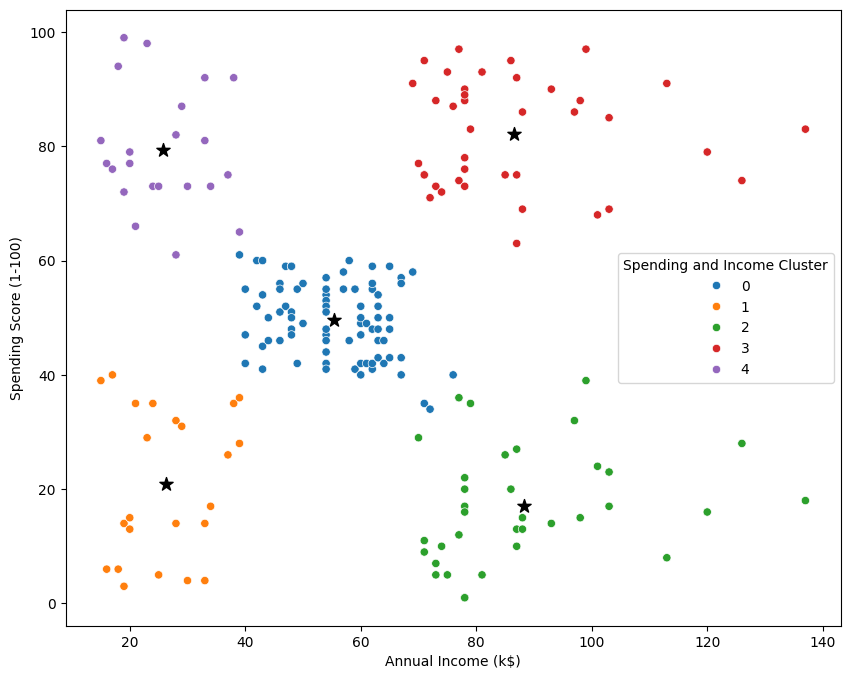

In [ ]:
plt.figure(figsize = (10,8))
plt.scatter(x = centers['x'], y=centers['y'], s = 100, c ='black', marker = '*')
sns.scatterplot(data = df, x = 'Annual Income (k$)', y = 'Spending Score (1-100)', hue = 'Spending and Income Cluster', palette = 'tab10');

In [ ]:
df.groupby('Spending and Income Cluster')[columns].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,42.716049,55.296296,49.518519
1,45.217391,26.304348,20.913043
2,41.114286,88.200000,17.114286
3,32.692308,86.538462,82.128205
4,25.272727,25.727273,79.363636


### Multivariate Cluster

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scale = StandardScaler()

In [ ]:
dff = pd.get_dummies(df, drop_first=True)
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,"Age, Income abd Spending Cluster",Gender_Male
0,19,15,39,2,1,4,True
1,21,15,81,2,4,5,True
2,20,16,6,2,1,4,False
3,23,16,77,2,4,5,False
4,31,17,40,2,1,4,False


In [ ]:
dff = dff[['Age','Annual Income (k$)','Spending Score (1-100)']]
dff.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [ ]:
dff = pd.DataFrame(scale.fit_transform(dff))

In [ ]:
inertia_scores = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(dff)
  inertia_scores.append(kmeans.inertia_)

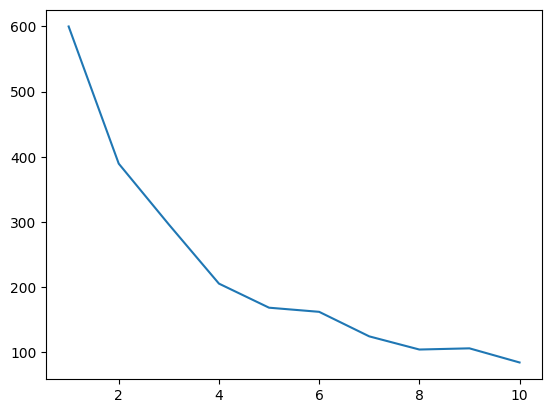

In [ ]:
plt.plot(range(1,11), inertia_scores);

,Age,Annual Income (k$),Spending Score (1-100)
"Age, Income abd Spending Cluster",,,
0,56.155556,53.377778,49.088889
1,41.685714,88.228571,17.285714
2,27.000000,56.657895,49.131579
3,32.692308,86.538462,82.128205
4,44.142857,25.142857,19.523810
5,25.272727,25.727273,79.363636
